# Programming Exercise 4: Neural Networks Learning

## Introduction 

In this exercise, you will implement the backpropagation algorithm for neural networks and apply it to the task of hand-written digit recognition. Before starting on the programming exercise, we strongly recommend watching the lectures and completing the review questions for the associated topic.

In this exercise, you will have to complete the following tw functions: 

- sigmoidGradient- Compute the gradient of the sigmoid function 
- nnCostFunction - Neural network cost function

**Instructions**:

For each function, we have provided starter code for you. You will find a description of the problems followed by a cell which contains some code. You will have to write your own code in these cells to complete the four functions mentioned above. Once you run the cells, your output would be displayed. If it matches the expected output, then you should continue with the next part of the exercise, else, you would have to try again. 

Please read the [Notebook FAQ](https://www.coursera.org/learn/machine-learning/supplement/S9fb6/jupyter-notebook-faq) to get familiar with the Jupyter environment and the commands. We also highly recommend going to your workspace to explore the files you will be working with before starting the exercise.

To go to the workspace: press on File ==> Open.

### NOTE:
You will find cells which contain the comment % GRADED FUNCTION: functionName. Do not edit that comment. Those cells will be used to grade your assignment. Each block of code with that comment should only have the function. 


#### After submitting your assignment, you can [check your grades here](https://www.coursera.org/learn/machine-learning/programming/yINgr/neural-networks-learning). 
  


## Neural Networks

In the previous exercise, you implemented feedforward propagation for neural networks and used it to predict handwritten digits with the weights we provided. In this exercise, you will implement the backpropagation algorithm to learn the parameters for the neural network.

### Visualizing the Data
 <img src="../readonly/Assignment4/figure 1.png" width="450" height="450">

We will load the data for you and display it on a 2-dimensional plot similar to Figure 1 by calling the function displayData. This is the same dataset that you used in the previous exercise. There are 5000 training examples in ex3data1.mat, where each training example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is represented by a floating point number indicating the grayscale intensity at that location. The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. Each of these training examples becomes a single row in our data matrix X. This gives us a 5000 by 400 matrix X where every row is a training example for a handwritten digit image.


$$X = \begin{bmatrix}
--(x^{(1)})^T -- \\
--(x^{(2)})^T -- \\
\vdots \\ 
--(x^{(m)})^T --
\end{bmatrix}
$$


The second part of the training set is a 5000-dimensional vector y that contains labels for the training set. To make things more compatible with Octave/MATLAB indexing, where there is no zero index, we have mapped the digit zero to the value ten. Therefore, a “0” digit is labeled as “10”, while the digits “1” to “9” are labeled as “1” to “9” in their natural order.

#### Run the cell below to load the data and to plot the image. 

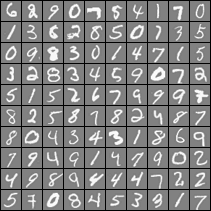

In [4]:
warning('off'); addpath('../readonly/Assignment4/');
load('ex4data1.mat');
m = size(X, 1);
                          % Setup the parameters you will use for this exercise
input_layer_size  = 400;  % 20x20 Input Images of Digits
hidden_layer_size = 25;   % 25 hidden units
num_labels = 10;          % 10 labels, from 1 to 10   
                          % (note that we have mapped "0" to label 10)

% Randomly select 100 data points to display
sel = randperm(size(X, 1));
sel = sel(1:100);

displayData(X(sel, :));

## Model representation
Our neural network is shown in Figure 2. It has 3 layers – an input layer, a hidden layer and an output layer. Recall that our inputs are pixel values
3
of digit images. Since the images are of size 20 × 20, this gives us 400 input layer units (not counting the extra bias unit which always outputs +1). The training data will be loaded for you into the variables X and y.
You have been provided with a set of network parameters $(\Theta^{(1)},\Theta^{(2)})$ already trained by us. These are stored in ex4weights.mat and will be loaded for you into `Theta1` and `Theta2`. The parameters have dimensions that are sized for a neural network with 25 units in the second layer and 10 output units (corresponding to the 10 digit classes).

<img src="../readonly/Assignment4/figure 2.png" width="450" height="450">



Feedforward and cost function
-----------------------------

Now you will implement the cost function and gradient for the neural
network. First, you will complete the code in the nnCostFunction to return
the cost.

Recall that the cost function for the neural network (without
regularization) is
$$J(\theta)=\frac{{1}}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}\left[
 -y_k^{(i)}\log((h_{\theta}(x^{(i)}))_k)-
 (1-y_k^{(i)})\log(1-(h_{\theta}(x^{(i)}))_k)\right]\tag{1}$$ where
$h_{\theta}(x^{(i)})$ is computed as shown in the Figure
2 and $K=10$ is the total number of possible labels.
Note that $h_\theta(x^{(i)})_k = a^{(3)}_k$ is the activation (output
value) of the $k$-th output unit. Also, recall that whereas the original
labels (in the variable `y`) were [1, 2, ..., 10], for the
purpose of training a neural network, we need to recode the labels as
vectors containing only values 0 or 1, so that

$$y = \begin{bmatrix}
1  \\
0  \\
0  \\
\vdots \\ 
0  \\
\end{bmatrix}
\quad
\begin{bmatrix}
0  \\
1  \\
0  \\
\vdots \\ 
0  \\
\end{bmatrix}
, \quad  \dots \quad  \mathrm{or} \quad
 \begin{bmatrix}
0  \\
0  \\
0  \\
\vdots \\ 
1  \\
\end{bmatrix}\tag{2}$$

For example, if $x^{(i)}$ is an image of the digit 5, then the
corresponding $y^{(i)}$ (that you should use with the cost function)
should be a 10-dimensional vector with $y_5 = 1$, and the other elements
equal to 0.

You should implement the feedforward computation that computes
$h_{\theta}(x^{(i)})$ for every example $i$ and sum the cost over all
examples. **Your code should also work for a dataset of any size, with
any number of labels** (you can assume that there are always at least
$K\geq3$ labels).

#### Implementation Note:
The matrix $X$ contains the examples in rows (i.e., $X(i,:)’$ is the i-th training example $x(i)$, expressed as a n × 1 vector.) When you complete the code in the nnCostFunction, you will need to add the column of 1’s to the $X$ matrix. The parameters for each unit in the neural network is represented in `Theta1` and `Theta2` as one row. Specifically, the first row of `Theta1` corresponds to the first hidden unit in the second layer. You can use a for-loop over the examples to compute the cost.

### Implementing the nnCostFunction 

nnCostFucntion implements the neural network cost function for a two layer neural network which performs classification. 

[J grad] = nnCostFunction(nn_params, hidden_layer_size, num_labels, X, y, lambda) computes the cost and gradient of the neural network. The parameters for the neural network are "unrolled" into the vector nn_params and need to be converted back into the weight matrices. The returned parameter grad should be a "unrolled" vector of the partial derivatives of the neural network. Reshape nn_params back into the parameters Theta1 and Theta2, the weight matrices for our 2 layer neural network.

You should complete the function by implementing three parts. All three parts will be coded in the same cell below. In *Part* 1 you will feed forward the neural network, compute the cost, and regularize it. In *Part* 2 you will implement back propogation. In *Part* 3, you will regularize the gradient.

**Part 1:** Feedforward the neural network and return the cost in the
            variable J. After implementing Part 1, you can verify that your
            cost function is correct by verifying that it matches our expected output. You will have to feedforward through the network to get your $h_\theta(x)$ (the same way you did in the last part of the previous exercise) and then you will use that result to compute the cost (i.e. set J to equation 1). To get the y that you will be using in equation 1, you will be given a vector y (m by 1) and you need to convert it to a (m by num_labels) matrix before using it. This new y will follow the same convention as equation 2. So if $y =\begin{bmatrix}
1\\
2\\
3 \end{bmatrix}$, then your new y will be 
$ \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \end{bmatrix}$. We have shown you how to do this in the tips preceding this exercise. 
            
    


In [13]:
load('ex4weights.mat');                 % Load the weights into variables Theta1 and Theta2
nn_params = [Theta1(:) ; Theta2(:)];    % Unroll parameters 
lambda = 0;
whos

Variables in the current scope:

   Attr Name                   Size                     Bytes  Class
   ==== ====                   ====                     =====  ===== 
        J                      1x1                          8  double
        Theta1                25x401                    80200  double
        Theta2                10x26                      2080  double
        X                   5000x400                 16000000  double
        ans                    1x1                          8  double
        grad               10285x1                      82280  double
        hidden_layer_size      1x1                          8  double
        input_layer_size       1x1                          8  double
        lambda                 1x1                          8  double
        m                      1x1                          8  double
        nn_params          10285x1                      82280  double
        num_labels             1x1                        

In [46]:
% GRADED FUNCTION: nnCostFunction
function [J grad] = nnCostFunction(nn_params, input_layer_size, ...
                                   hidden_layer_size, ...
                                   num_labels, ...
                                   X, y, lambda)

Theta1 = reshape(nn_params(1:hidden_layer_size * (input_layer_size + 1)), ...
                 hidden_layer_size, (input_layer_size + 1));

Theta2 = reshape(nn_params((1 + (hidden_layer_size * (input_layer_size + 1))):end), ...
                 num_labels, (hidden_layer_size + 1));

m = size(X, 1);                               % Setup some useful variables
J = 0;                                        % You need to return the following variables correctly 
Theta1_grad = zeros(size(Theta1));
Theta2_grad = zeros(size(Theta2));

% ====================== YOUR CODE HERE ======================
% X is 5000 by 400
% Theta1 is 25 by 401
% Theta2 is 10 by 26

% PART 1: FEED FORWARD PROPAGATION
X = [ones(m,1) X];
Ys = zeros(size(y,1), size(Theta2,1));
for i = 1:m
    Ys(i, y(i)) = 1;
end

x = X; % 5000 x 401 
a2 = sigmoid(x * Theta1');
m2 = size(a2,1);
a2 = [ones(m2,1) a2]; % 5000 x 26
a3 = sigmoid(a2 * Theta2'); % 5000 x 10

J = (1 / m) * sum(sum((-Ys) .* log(a3) - (1 - Ys) .* log(1 - a3), 2));

% PART 2: REGULARIZATION 
Theta1_b =  Theta1(:,2:end);
Theta2_b = Theta2(:,2:end);

t1 = sum(sum(Theta1_b.^2));
t2 = sum(sum(Theta2_b.^2));

J = J + (lambda/(2 * m)) * (t1 + t2);

% PART 3: BACK PROPAGATION
D3 = (a3 - Ys)';
D2 = (Theta2' * D3)' .* a2 .* (1-a2);
Theta1_grad = Theta1_grad + (x' * D2)'(2:end,:);
Theta2_grad = Theta2_grad + D3 * a2;
Theta1_grad = (1 ./ m) * Theta1_grad + (lambda / m)*[zeros(size(Theta1, 1), 1) Theta1(:, 2:end)];
Theta2_grad = (1 ./ m) * Theta2_grad + (lambda / m)*[zeros(size(Theta2, 1), 1) Theta2(:, 2:end)];  


% ============================================================

grad = [Theta1_grad(:) ; Theta2_grad(:)];     % Unroll gradients

end

In [47]:
% Testing your nnCostFunction for the non regularized cost Function 
lambda = 1;                                   % Change lambda to 1 when checking for regularization
[J grad] = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda);
J

J =  0.38377


**Expected Output**: Non-regularized costFunction 

0.28763

**Expected Output**: Regularized costFunction for $\lambda = 1$

0.383770. 

### Regularized Neural Networks - Cost

The cost function for neural networks with regularization is given by

$$\begin{aligned}
J(\theta) = & \frac{{1}}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}\left[
 -y_k^{(i)}\log((h_{\theta}(x^{(i)}))_k)-
 (1-y_k^{(i)})\log(1-(h_{\theta}(x^{(i)}))_k)\right] +  \\
&  \frac{\lambda}{2m}  \left[ \sum_{j=1}^{25}\sum_{k=1}^{400} {(\Theta^{(1)}_{j,k}})^2 + 
\sum_{j=1}^{10}\sum_{k=1}^{25} {(\Theta^{(2)}_{j,k}})^2\right] \end{aligned}\tag{3}$$

You can assume that the neural network will only have 3 layers – an
input layer, a hidden layer and an output layer. However, your code
should work for any number of input units, hidden units and output
units. While we have explicitly listed the indices above for
$\Theta^{(1)}$ and $\Theta^{(2)}$ for clarity, do note that **your code
should in general work with $\Theta^{(1)}$ and $\Theta^{(2)}$ of any
size**.

Note that you should not be regularizing the terms that correspond to
the bias. For the matrices $Theta1$ and $Theta2$, this
corresponds to the first column of each matrix. Notice that you can first compute
the unregularized cost function $J$ using your existing
nnCostFunction and then later add the cost for the
regularization terms. Once you are done, you can run nnCostFunction
using the loaded set of parameters for $Theta1$ and $Theta2$,
and $\lambda = 1$. You should now add the extra terms we have added in equation 
Hint: You can implement this around the code for backpropagation. That is, you can compute the gradients for the regularization separately and then add them to Theta1_grad and Theta2_grad from Part 2.
    


Backpropagation
===============

Now you will implement the backpropagation
algorithm to compute the gradient for the neural network cost function.
You will need to complete the nnCostFunction so that it returns
an appropriate value for grad. Once you have computed the
gradient, you will be able to train the neural network by minimizing the
cost function $J(\Theta)$ using an advanced optimizer such as
fmincg.

However, before completing the nnCostFunction, you will have to complete two functions below which will help us with the backpropogation. After completing them, you will implement the backpropogation algorithm described below. Once that is working, you will add regularization to it. 


### 1 - Sigmoid gradient

To help you get started with this part of the exercise, you will first
implement the sigmoid gradient function. The gradient for the sigmoid
function can be computed as


$$g'(z) = \frac{d}{dz}g(z) = g(z) (1 - g(z))\tag{4}$$

where

$$\mathrm{sigmoid}(z) = g(z) = \frac{1}{1+e^{-z}}\tag{5}$$

When you are done, try testing a few values by calling
sigmoidGradient(z) in the cell following it. For large
values (both positive and negative) of $z$, the gradient should be
close to 0. When $z= 0$, the gradient should be exactly 0.25. Your
code should also work with vectors and matrices. For a matrix, your
function should perform the sigmoid gradient function on every element.

**Implementation**:

**g = sigmoidGradient(z)** computes the gradient of the sigmoid function
evaluated at z. This should work regardless if z is a matrix or a
vector. In particular, if z is a vector or matrix, you should return
the gradient for each element. You already have the sigmoid function in your workspace and could use it. You should set g equal to equation 4.

In [48]:
% GRADED FUNCTION: sigmoidGradient
function g = sigmoidGradient(z)

g = zeros(size(z));

% ====================== YOUR CODE HERE ======================
g_temp = 1.0 ./ (1.0 + exp(-z));
g = g_temp .* (1 - g_temp);

% =============================================================

end

In [49]:
% Testing your function 
g = sigmoidGradient([-1 -0.5 0 0.5 1])

g =

   0.19661   0.23500   0.25000   0.23500   0.19661



**Expected Output**

0.19661   0.23500   0.25000   0.23500   0.19661

### 2 - Random initialization

When training neural networks, it is important to randomly initialize
the parameters for symmetry breaking. One effective strategy for random
initialization is to randomly select values for $\Theta^{(l)}$ uniformly
in the range \[$-\epsilon_{init}, \epsilon_{init}$\]. You should use
$\epsilon_{init}=0.12$. This range of values ensures that the
parameters are kept small and makes the learning more efficient.

We have provided you with the randInitializeWeights function which will initialize the
weights for $\Theta$. One effective strategy for choosing $\epsilon_{init}$ is to baseit on the number of units in the network. A good choice of $\epsilon_{init}$ is $\epsilon_{init}=\frac{\sqrt{6}}{\sqrt{L_{in}+L_{out}}}$, where $L_{in}=s_l$ and $L_{out}=s_{l+1}$ are the number of units in the layers adjacent to $\Theta^{(l)}$.
    
**Implementation:**

The function below randomly initializes the weights of a layer with L_in
incoming connections and L_out outgoing connections. This breaks the symmetry while training the neural network. Note that W should be set to a matrix of size(L_out, 1 + L_in) as the first column of W handles the "bias" terms.

In [50]:
function W = randInitializeWeights(L_in, L_out)

W = zeros(L_out, 1 + L_in);                                 % Return the following variables correctly 

% Randomly initialize the weights to small values
epsilon_init = 0.12;
W = rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init;

end

In [51]:
% Initialize our weights
initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size);
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels);

% Unroll parameters
initial_nn_params = [initial_Theta1(:) ; initial_Theta2(:)];

### 3 - Backpropogation

<img src="../readonly/Assignment4/figure 3.png" width="500" height="500">

Now that we have our $\Theta$'s you will implement the backpropagation algorithm. Recall that the
intuition behind the backpropagation algorithm is as follows. Given a
training example ($x^{(t)}, y^{(t)}$), we will first run a “forward
pass” to compute all the activations throughout the network, including
the output value of the hypothesis $h_{\Theta}(x)$. Then, for each node
$j$ in layer $l$, we would like to compute an “error term”
$\delta^{(l)}_j$ that measures how much that node was “responsible” for
any errors in our output.

For an output node, we can directly measure the difference between the
network’s activation and the true target value, and use that to define
$\delta^{(3)}_j$ (since layer $3$ is the output layer). For the hidden
units, you will compute $\delta^{(l)}_j$ based on a weighted average of
the error terms of the nodes in layer $(l+1)$.

In detail, here is the backpropagation algorithm (also depicted in
Figure 3): 

You should do it in a vectorized way.

-   1\. Set the input layer’s values ($a^{(1)}$) to the $t$-th training
    example $x^{(t)}$. Perform a feedforward pass (Figure
    2), computing the activations
    ($z^{(2)},a^{(2)},z^{(3)},a^{(3)}$) for layers $2$ and $3$. Note that
    you need to add a $+1$ term to ensure that the vectors of
    activations for layers $a^{(1)}$ and $a^{(2)}$ also include the bias
    unit. In Octave/MATLAB, if a_1 is a column vector, adding one
    corresponds to a_1 = [1 ; a_1].

-   2\. For each output unit $k$ in layer $3$ (the output layer), set
    $$\delta^{(3)}_k =  (a^{(3)}_k - y_k),\tag{6}$$

    where $y_k \in \{0, 1\}$ indicates whether the current training
    example belongs to class $k$ ($y_k = 1$), or if it belongs to a
    different class ($y_k = 0$). You may find logical arrays helpful for
    this task (explained in the previous programming exercise).

-   3\. For the hidden layer $l = 2$, set
    $$\delta^{(2)} = \left( \Theta^{(2)} \right)^T\delta^{(3)} .* (a^{(2)}(1 - a^{(2)}))\tag{7}$$
    Where $(a^{(2)}(1 - a^{(2)}))$ is the simplified form of the sigmoid gradient of $z^{(2)}$ including the bias unit.

-   4\. Accumulate the gradient from this example using the following
    formula. Note that you should skip or remove $\delta_0^{(2)}$. In
    Octave/MATLAB, removing $\delta_0^{(2)}$ corresponds to delta_2 =
    delta_2(2:end).
    $$%\Delta_{ij}^{(l)} = \Delta_{ij}^{(l)} + \delta_i^{(l+1)}  a^{(l)}_j
    \Delta^{(l)} = \Delta^{(l)} + \delta^{(l+1)} (a^{(l)})^T\tag{8}$$

-   5\. Obtain the (unregularized) gradient for the neural network cost
    function by dividing the accumulated gradients by $\frac{1}{m}$:
    $$\frac{\partial}{\partial \Theta_{ij}^{(l)}} J(\Theta) = D_{ij}^{(l)} = \frac{1}{m}\Delta_{ij}^{(l)}\tag{9}$$
    

Octave/MATLAB Tip: You should implement the backpropagation algorithm only after you have successfully completed the feedforward and cost functions. While implementing the backpropagation algorithm, it is often useful to use the size function to print out the sizes of the variables you are working with if you run into dimension mismatch errors (“nonconformant arguments” errors in Octave/MATLAB). Once you are done we will proceed to run gradient checking on your implementation. The gradient check will allow you to increase your confidence that your code is computing the gradients correctly.

**Instructions**: If you were to do it the vectorized way, you should start by computing equation 6. This means that you would have to take your final sigmoid, $a^{(3)}$, and subtract from it your new y. This will leave you with your $\delta^{(3)}$ (don't forget to divide it by m). Now that you have your $\delta^{(3)}$, you could compute **Theta2_grad** by computing equation 8. In other words, you will need to multiply $\delta^{(3)}$ by the first sigmoid, $a^{(1)}$, you have computed. You could use size($\delta^{(3)}$) and size($a^{(1)}$) to see how you need to transpose them before multiplying. Now you still need to compute Theta1_grad. To do so, you need to compute $\delta^{(2)}$ by setting it equal to equation 7. Remember that $a^{(2)}$ is the first sigmoid you have computed. Once you compute $\delta^{(2)}$, you need to multiply it by X to get **Theta1_grad**. However, make sure you do not include the bias term of $\delta^{(2)}$ when you are multiplying !!

Gradient checking
-----------------

In your neural network, you are minimizing the cost function
$J(\Theta)$. To perform gradient checking on your parameters, you can
imagine “unrolling” the parameters $\Theta^{(1)},\Theta^{(2)}$ into a
long vector $\theta$. By doing so, you can think of the cost function
being $J(\theta)$ instead and use the following gradient checking
procedure.

Suppose you have a function $f_i(\theta)$ that purportedly computes
$\frac{\partial}{\partial \theta_i} J(\theta)$; you’d like to check if
$f_i$ is outputting correct derivative values.

$$\mathrm{Let \quad} \theta^{(i+)} = \theta + 
\begin{bmatrix}0 \\ 0 \\ \vdots \\ \epsilon \\ \vdots \\ 0\end{bmatrix}
\quad\quad\mathrm{and}\quad
\theta^{(i-)} = \theta -
 \begin{bmatrix}{c}0 \\ 0 \\ \vdots \\ \epsilon \\ \vdots \\ 0\end{bmatrix}$$

So, $\theta^{(i+)}$ is the same as $\theta$, except its $i$-th element
has been incremented by $\epsilon$. Similarly, $\theta^{(i-)}$ is the
corresponding vector with the $i$-th element decreased by $\epsilon$.
You can now numerically verify $f_i(\theta)$’s correctness by checking,
for each $i$, that: $$f_i(\theta) \approx 
\frac{J(\theta^{(i+)}) - J(\theta^{(i-)})}{2 \epsilon}.$$

The degree to which these two values should approximate each other will
depend on the details of $J$. But assuming $\epsilon = 10^{-4}$, you’ll
usually find that the left- and right-hand sides of the above will agree
to at least 4 significant digits (and often many more).

We have implemented the function to compute the numerical gradient for
you in computeNumericalGradient. While you are not required to
modify the file, we highly encourage you to take a look at the code to
understand how it works.

In the next step below, we will run the provided function
checkNNGradients which will create a small neural network and
dataset that will be used for checking your gradients. If your
backpropagation implementation is correct, you should see a relative
difference that is less than 1e-9.

**Practical Tip:** When performing gradient checking, it is much more efficient to use a small neural network with a relatively small number of input units and hidden units, thus having a relatively small number of parameters. Each dimension of θ requires two evaluations of the cost function and this can be expensive. In the function checkNNGradients, our code creates a small random model and dataset which is used with computeNumericalGradient for gradient checking. Furthermore, after you are confident that your gradient computations are correct, you should turn off gradient checking before running your learning algorithm. Gradient checking works for any function where you are computing the cost and the gradient. Concretely, you can use the same computeNumericalGradient.m function to check if your gradient imple- mentations for the other exercises are correct too (e.g., logistic regression’s cost function).



### Check Neural Network Gradient 

This section will be used to check if your backpropogation algorith is working properly. 

In [52]:
checkNNGradients;

  -9.2783e-03  -9.2783e-03
   8.8991e-03   8.8991e-03
  -8.3601e-03  -8.3601e-03
   7.6281e-03   7.6281e-03
  -6.7480e-03  -6.7480e-03
  -3.0498e-06  -3.0498e-06
   1.4287e-05   1.4287e-05
  -2.5938e-05  -2.5938e-05
   3.6988e-05   3.6988e-05
  -4.6876e-05  -4.6876e-05
  -1.7506e-04  -1.7506e-04
   2.3315e-04   2.3315e-04
  -2.8747e-04  -2.8747e-04
   3.3532e-04   3.3532e-04
  -3.7622e-04  -3.7622e-04
  -9.6266e-05  -9.6266e-05
   1.1798e-04   1.1798e-04
  -1.3715e-04  -1.3715e-04
   1.5325e-04   1.5325e-04
  -1.6656e-04  -1.6656e-04
   3.1454e-01   3.1454e-01
   1.1106e-01   1.1106e-01
   9.7401e-02   9.7401e-02
   1.6409e-01   1.6409e-01
   5.7574e-02   5.7574e-02
   5.0458e-02   5.0458e-02
   1.6457e-01   1.6457e-01
   5.7787e-02   5.7787e-02
   5.0753e-02   5.0753e-02
   1.5834e-01   1.5834e-01
   5.5924e-02   5.5924e-02
   4.9162e-02   4.9162e-02
   1.5113e-01   1.5113e-01
   5.3697e-02   5.3697e-02
   4.7146e-02   4.7146e-02
   1.4957e-01   1.4957e-01
   5.3154e-02   5.3154e-02
 

**Expected Output**: $\leq$ 1e9

### Regularized Neural Networks - Gradient


After you have successfully implemeted the backpropagation algorithm,
you will add regularization to the gradient. To account for
regularization, it turns out that you can add this as an additional term
*after* computing the gradients using backpropagation.

Specifically, after you have computed $\Delta_{ij}^{(l)}$ using
backpropagation, you should add regularization using

$$\frac{\partial}{\partial \Theta_{ij}^{(l)}} J(\Theta) = D_{ij}^{(l)} = \frac{1}{m}\Delta_{ij}^{(l)}  \quad\quad\quad\quad\quad\quad \mbox{for $j = 0$}\tag{10}$$
$$\frac{\partial}{\partial \Theta_{ij}^{(l)}} J(\Theta) = D_{ij}^{(l)} = \frac{1}{m}\Delta_{ij}^{(l)} + \frac{\lambda}{m} \Theta_{ij}^{(l)} \quad\quad \mbox{for $j \geq 1$}\tag{11}$$

Note that you should *not* be regularizing the first column of
$\Theta^{(l)}$ which is used for the bias term. Furthermore, in the
parameters $\Theta^{(l)}_{ij}$, $i$ is indexed starting from 1, and $j$
is indexed starting from 0. Thus, 

$$\Theta^{(l)} = 
\begin{bmatrix}          
\Theta^{(i)}_{1,0} & \Theta^{(l)}_{1,1} & \ldots \\ 
\Theta^{(i)}_{2,0} & \Theta^{(l)}_{2,1} \\ 
\vdots & & \ddots
\end{bmatrix}$$

Somewhat confusingly, indexing in Octave/MATLAB starts from 1 (for both
$i$ and $j$), thus Theta1(2, 1) actually corresponds to
$\Theta^{(l)}_{2,0}$ (i.e., the entry in the second row, first column of
the matrix $\Theta^{(1)}$ shown above). 

Now modify your code that computes grad in nnCostFunction to account for regularization. You just have to add the extra term $\frac {\lambda}{m} \Theta$ to your gradients. Make sure you do not add the bias term. After you are done, run all the cells and check the gradient checking results on your implementation. If your code is correct, you should expect to see a relative difference that is less than 1e-9.

In [53]:
%  Checking if your regularized NN is working 
lambda = 3;
checkNNGradients(lambda);

% Also output the costFunction debugging values
debug_J  = nnCostFunction(nn_params, input_layer_size, ...
                          hidden_layer_size, num_labels, X, y, lambda);

fprintf(['\n\nCost at (fixed) debugging parameters (w/ lambda = %f): %f ' ...
         '\n(for lambda = 3, this value should be about 0.576051)\n\n'], lambda, debug_J);


  -9.2783e-03  -9.2783e-03
   8.8991e-03   8.8991e-03
  -8.3601e-03  -8.3601e-03
   7.6281e-03   7.6281e-03
  -6.7480e-03  -6.7480e-03
  -1.6768e-02  -1.6768e-02
   3.9433e-02   3.9433e-02
   5.9336e-02   5.9336e-02
   2.4764e-02   2.4764e-02
  -3.2688e-02  -3.2688e-02
  -6.0174e-02  -6.0174e-02
  -3.1961e-02  -3.1961e-02
   2.4923e-02   2.4923e-02
   5.9772e-02   5.9772e-02
   3.8641e-02   3.8641e-02
  -1.7370e-02  -1.7370e-02
  -5.7566e-02  -5.7566e-02
  -4.5196e-02  -4.5196e-02
   9.1459e-03   9.1459e-03
   5.4610e-02   5.4610e-02
   3.1454e-01   3.1454e-01
   1.1106e-01   1.1106e-01
   9.7401e-02   9.7401e-02
   1.1868e-01   1.1868e-01
   3.8193e-05   3.8193e-05
   3.3693e-02   3.3693e-02
   2.0399e-01   2.0399e-01
   1.1715e-01   1.1715e-01
   7.5480e-02   7.5480e-02
   1.2570e-01   1.2570e-01
  -4.0759e-03  -4.0759e-03
   1.6968e-02   1.6968e-02
   1.7634e-01   1.7634e-01
   1.1313e-01   1.1313e-01
   8.6163e-02   8.6163e-02
   1.3229e-01   1.3229e-01
  -4.5296e-03  -4.5296e-03
 

## Learning parameters using fmincg
After you have successfully implemented the neural network cost function and gradient computation, the next step of the exercise will require to use fmincg to learn a good set of parameters.
After the training completes, we will report the training accuracy of your classifier by computing the percentage of examples your model got correct. If your implementation is correct, you should see a reported training accuracy of about 95.3% (this may vary by about 1% due to the random initialization). It is possible to get higher training accuracies by training the neural network for more iterations. We encourage you to try training the neural network for more iterations (e.g., set $MaxIter$ to 400) and also vary the regularization parameter $\lambda$. With the right learning settings, it is possible to get the neural network to perfectly fit the training set.

### Implementation: 

You have now implemented all the code necessary to train a neural 
network. To train your neural network, we will now use "fmincg", which
is a function which works similarly to "fminunc". Recall that these
advanced optimizers are able to train our cost functions efficiently as
long as we provide them with the gradient computations.

Once you run it for the first time, you could change the value of $MaxIter$ to see how more training helps. 

In [54]:
initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size);
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels);

% Unroll parameters
initial_nn_params = [initial_Theta1(:) ; initial_Theta2(:)];

In [55]:
options = optimset('MaxIter', 50);
lambda = 1;                          %  You should also try different values of lambda
                                     % Create "short hand" for the cost function to be minimized
costFunction = @(p) nnCostFunction(p, ...
                                   input_layer_size, ...
                                   hidden_layer_size, ...
                                   num_labels, X, y, lambda);

% Now, costFunction is a function that takes in only one argument (the
% neural network parameters)
[nn_params, cost] = fmincg(costFunction, initial_nn_params, options);

% Obtain Theta1 and Theta2 back from nn_params
Theta1 = reshape(nn_params(1:hidden_layer_size * (input_layer_size + 1)), ...
                 hidden_layer_size, (input_layer_size + 1));

Theta2 = reshape(nn_params((1 + (hidden_layer_size * (input_layer_size + 1))):end), ...
                 num_labels, (hidden_layer_size + 1));

Iteration    50 | Cost: 5.919210e-01


#### Prediction

After training the neural network, we would like to use it to predict
the labels. You will now implement the "predict" function to use the
neural network to predict the labels of the training set. This lets
you compute the training set accuracy.

In [56]:
pred = predict(Theta1, Theta2, X);
Accuracy =  mean(double(pred == y)) * 100 

Accuracy =  95.400


**Expected Output:**

Accuracy = $95.3 \pm 1$ %

Visualizing the hidden layer
============================

One way to understand what your neural network is learning is to
visualize the representations captured by the hidden units.
Informally, given a particular hidden unit, one way to visualize what it
computes is to find an input x that will cause it to activate (that is,
to have an activation value ($a^{(l)}_i$) close to 1). For the neural
network you trained, notice that the $i^{th}$ row of $\Theta^{(1)}$ is a
401-dimensional vector that represents the parameter for the $i^{th}$
hidden unit. If we discard the bias term, we get a 400 dimensional
vector that represents the weights from each input pixel to the hidden
unit.

Thus, one way to visualize the “representation” captured by the hidden
unit is to reshape this 400 dimensional vector into a
$20\times20$ image and display it. We will display the image for you below and it will show you an image (similar to Figure 4) with 25 units, each corresponding to one hidden unit in the network.


In your trained network, you should find that the hidden units
corresponds roughly to detectors that look for strokes and other
patterns in the input.

<img src="../readonly/Assignment4/figure 4.png" width="450" height="450">



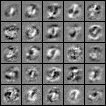

In [57]:
displayData(Theta1(:, 2:end));

### Optional (ungraded) exercise
In this part of the exercise, you will get to try out different learning settings for the neural network to see how the performance of the neural network varies with the regularization parameter $\lambda$ and number of training steps (the $MaxIter$ option when using fmincg).

Neural networks are very powerful models that can form highly complex decision boundaries. Without regularization, it is possible for a neural network to “overfit” a training set so that it obtains close to $100$% accuracy on the training set but does not as well on new examples that it has not seen before. You can set the regularization $\lambda$ to a smaller value and the MaxIter parameter to a higher number of iterations to see this for youself.

You will also be able to see for yourself the changes in the visualizations of the hidden units when you change the learning parameters $\lambda$ and MaxIter.